In [16]:
import numpy as np

DAB = 0.08*10**-4 # m^2/s
rho = 0.875*62.2 # lb_m/ft^3
P = 101325 # Pa
yB0 = 105/760 
D = 15*0.3048 # m
L = (0.5/12)*0.3048 # m
T = 25 + 273.15 # K
R = 8.314 # Pa-m^3/mol-K
MB = 0.07811 # kg/mol

p_sat = np.exp(13.7819-2726.81/(217.572+T-273.15)) # kPa
DAB_new = 0.077*10**-4 # m^2/s
yB0_new = 1000*p_sat/P

print('D_AB = %0.3f' % DAB)
print('rho = %0.3f' % rho)
print('P = %0.3f' % P)
print('yB0 = %0.3f' % yB0)
print('D = %0.3f' % D)
print('L = %0.5f' % L)
print('T = %0.3f' % T)

m_dot = -(np.pi*D**2/(4*L))*(P*MB*DAB/(R*T))*np.log(1-yB0) # kg/s

print('m_dot = %0.6f' % m_dot)

m_dot = m_dot*2.20462*3600*24

print('m_dot = %0.3f' % m_dot)

print('p_sat = %0.3f' % p_sat)

m_dot_new = -(np.pi*D**2/(4*L))*(P*MB*DAB_new/(R*T))*np.log(1-yB0_new) # kg/s

print('m_dot = %0.6f' % m_dot_new)

m_dot_new = m_dot_new*2.20462*3600*24

print('m_dot = %0.3f' % m_dot_new)
print(yB0_new)

print((m_dot-m_dot_new)/m_dot_new)

D_AB = 0.000
rho = 54.425
P = 101325.000
yB0 = 0.138
D = 4.572
L = 0.01270
T = 298.150
m_dot = 0.004909
m_dot = 935.139
p_sat = 12.688
m_dot = 0.004252
m_dot = 809.880
0.12522127747046816
0.1546648921034086


In [49]:
DAB = 0.694*10**-4 # m^2/s
P = 101325 # Pa
yA0 = 0.8
yAL = 0.1
D = (1.049/12)*0.3048 # m
L = 1 # m
T = 298 # K
R = 8.314 # Pa-m^3/mol-K

A = (np.pi/4)*D**2

N_A = (yA0-yAL)*P*DAB/(R*T*L)


print('D_AB = %0.5f' % DAB)
print('P = %0.5f' % P)
print('D = %0.5f' % D)
print('L = %0.5f' % L)

print('N_A = %0.5f' % N_A)

n_A = 20 # mol

dt = n_A/(A*N_A)

print('t (s) = %0.3f' % dt)

dt = dt/(3600*24)

print('t (days) = %0.3f' % dt)


D_AB = 0.00007
P = 101325.00000
D = 0.02664
L = 1.00000
N_A = 0.00199
t (s) = 18054017.789
t (days) = 208.959


t (s) = 17766296581.593
t (years) = 562.980


C:\Users\pheng\AppData\Local\Temp\ipykernel_31512\212704647.py:43: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


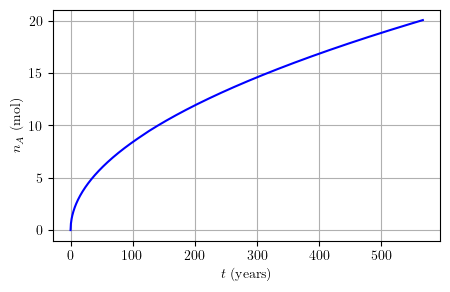

In [80]:
from scipy import special
from scipy import integrate
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

dc = P*(yA0-yAL)/(R*T)

q_func = lambda t: np.exp(-L**2/(4*DAB*t))/np.sqrt(t)

def func(t):
    f = - n_A
    res = integrate.quad(q_func,0,t)
    f += A*dc*np.sqrt(DAB/np.pi)*res[0]
    return f

sol = root_scalar(func,x0=18054017)

dt = sol.root

print('t (s) = %0.3f' % dt)

dt = dt/(3600*24*365.25)

print('t (years) = %0.3f' % dt)


t = np.linspace(1e-15,17896658213.245,1000)
flux = np.zeros(np.size(t))
for i in range(np.size(t)):
    flux[i] = func(t[i]) + n_A


font = {'family' : 'serif',
         'size'   : 12,
         'serif':  'cmr10'
         }
plt.rcParams["figure.figsize"] = (5,3)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "cmr10",
})
fig, ax = plt.subplots()
plt.plot(t/(3600*24*365.25),flux,color='b')
plt.xlabel('$t$ (years)')
plt.ylabel('$n_A$ (mol)')
plt.axis('tight')
plt.grid()
plt.show()

fig.savefig('CHEN_3100_HW_12_1.png',dpi=300,bbox_inches='tight')

In [76]:
from scipy import special
from scipy import integrate
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

dc = P*(yA0-yAL)/(R*T)


def f(t,N=20):
    f = A*DAB*(dc/L)*t
    for n in range(1,N):
        eig = (n*np.pi/L)**2
        f -= A*DAB*(dc/L)*2*np.exp(-eig*DAB*t)*(1-np.cos(n*np.pi))*np.cos(n*np.pi)/(eig*DAB)
    return f
obj_func = lambda t: f(t) - n_A

res = root_scalar(obj_func,x0=1e6)

t = res.root

print(t)
    

18054017.7886295
